In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('FINAL_3Meses.csv')
df.head()

,Unnamed: 0,id,min,max,mean,median,range,variance,flat_spots,max_var_shift,...,mean_absolute_change,skewness,crossing_points,holt_alpha,holt_beta,hw_level,hw_slope,hw_season,lm_Statistic,lm_pValue
0,0,-CC_CUB_OcD1-FC_OcD_0_CC_OcD_RTE_03_TA,15.291500,25.229601,20.002963,19.283701,9.938101,6.482179,3,0.838125,...,0.040274,0.328762,67,0.708986,0.167372,20.002914,0.0,0.0,8743.7533\n,0.0
1,0,-CC_P2_OcC_1-VF_OcCs_0_CC_OcC_11_TA,19.860399,25.885500,22.603836,22.273300,6.025101,2.812242,4,0.243746,...,0.024805,0.422690,105,0.651968,0.002743,22.603751,0.0,0.0,8606.1494\n,0.0
2,0,-CC_PB_AfA-VF_MeA_2_CC_AfA_27_TA,15.632600,29.642799,22.709776,22.261999,14.010200,12.549774,3,4.484526,...,0.062444,0.143222,45,1.000000,0.237778,22.709776,0.0,0.0,8299.9323\n,0.0
3,0,-CC_EP-PR_P1_E_FC_HAB148_TA,12.290000,26.650000,18.794633,18.030001,14.360000,14.346962,10,1.656935,...,0.041529,0.249570,28,0.896206,0.559015,18.794633,0.0,0.0,8920.0085\n,0.0
4,0,-CC_P13_LV-VF_Lv_14_CC_Lv13_12_TA,21.566200,28.877899,25.145806,25.142599,7.311699,1.077610,3,0.303892,...,0.065115,0.234925,205,1.000000,0.805623,25.145806,0.0,0.0,8666.0545\n,0.0


In [3]:
df.isna().sum()

Unnamed: 0                  0
id                          0
min                         1
max                         1
mean                        1
median                      1
range                       1
variance                    1
flat_spots                  0
max_var_shift               1
max_level_shift             1
lumpiness                   1
stability                   1
entropy                     0
KPSS                        4
KPSS_pValue                 4
abs_energy                  0
absolute_sum_of_changes     0
ADF_Value                   4
ADF_pValue                  4
count_above_mean            0
count_below_mean            0
kurtosis                    1
mean_absolute_change        1
skewness                    1
crossing_points             0
holt_alpha                 10
holt_beta                  10
hw_level                    1
hw_slope                    1
hw_season                   1
lm_Statistic                1
lm_pValue                   4
dtype: int

In [6]:
null_columns=df.columns[df.isnull().any()]
df[df["min"].isnull()][null_columns]

,min,max,mean,median,range,variance,max_var_shift,max_level_shift,lumpiness,stability,...,kurtosis,mean_absolute_change,skewness,holt_alpha,holt_beta,hw_level,hw_slope,hw_season,lm_Statistic,lm_pValue
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#empty files
df.drop(53, inplace=True)

In [9]:
df.isna().sum()

id                         0
min                        0
max                        0
mean                       0
median                     0
range                      0
variance                   0
flat_spots                 0
max_var_shift              0
max_level_shift            0
lumpiness                  0
stability                  0
entropy                    0
abs_energy                 0
absolute_sum_of_changes    0
count_above_mean           0
count_below_mean           0
kurtosis                   0
mean_absolute_change       0
skewness                   0
crossing_points            0
hw_level                   0
hw_slope                   0
hw_season                  0
dtype: int64

In [10]:
#constant values
df.drop(['hw_season','hw_slope'],axis=1, inplace=True)

In [11]:
df2=df.drop('id',axis=1)

# PCA

In [12]:
x = df2.values
x = StandardScaler().fit_transform(x)

In [13]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [14]:
print(pca.explained_variance_ratio_)

[0.33874796 0.2571404  0.15321392 0.09514509 0.04709318]


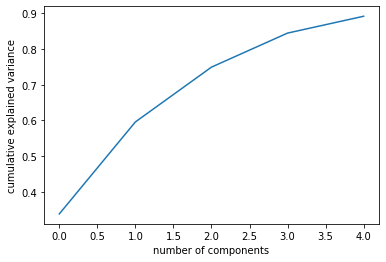

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Hierarchical Clustering

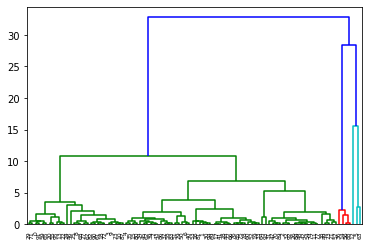

In [17]:
mergings = linkage(principalComponents, method='ward')
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

Entre 2, 3 y 4

# Agglomerative Clustering

## 2 Clusters

In [18]:
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [19]:
y_hc2=hc2.fit_predict(principalComponents)
y_hc2

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

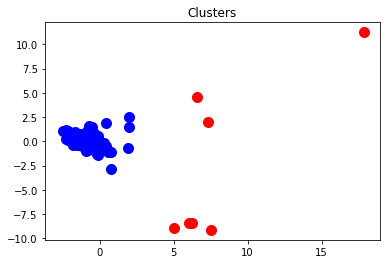

In [20]:
plt.scatter(principalComponents[y_hc2==0, 0], principalComponents[y_hc2==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(principalComponents[y_hc2==1, 0], principalComponents[y_hc2==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters')
plt.show()

In [21]:
df['Cluster']= y_hc2

In [22]:
final= df[['id','Cluster']]
final.head()

,id,Cluster
0,-CC_CUB_OcD1-FC_OcD_0_CC_OcD_RTE_03_TA,1
1,-CC_P2_OcC_1-VF_OcCs_0_CC_OcC_11_TA,1
2,-CC_PB_AfA-VF_MeA_2_CC_AfA_27_TA,1
3,-CC_EP-PR_P1_E_FC_HAB148_TA,1
4,-CC_P13_LV-VF_Lv_14_CC_Lv13_12_TA,1


In [23]:
final[final.Cluster==1]

,id,Cluster
0,-CC_CUB_OcD1-FC_OcD_0_CC_OcD_RTE_03_TA,1
1,-CC_P2_OcC_1-VF_OcCs_0_CC_OcC_11_TA,1
2,-CC_PB_AfA-VF_MeA_2_CC_AfA_27_TA,1
3,-CC_EP-PR_P1_E_FC_HAB148_TA,1
4,-CC_P13_LV-VF_Lv_14_CC_Lv13_12_TA,1
...,...,...
92,-CC_PF-PF_PB_FC_ROP_TA,1
93,-CC_P2_OcF_2-VF_OcFn_2_CC_OcF_04_TA,1
94,-Zelandia-P1_VRV_8_TA,1
95,-CC_P15_LV-VF_Lv_16_CC_Lv15_09_TA,1


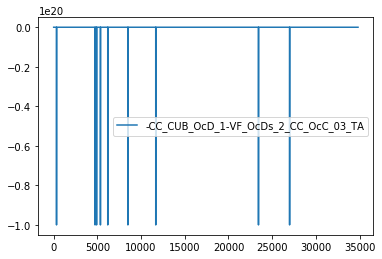

In [24]:
out= pd.read_csv('./DONE/-CC_CUB_OcD_1-VF_OcDs_2_CC_OcC_03_TA.csv')
out.plot()

## 3 Clusters

In [25]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc3=hc3.fit_predict(principalComponents)

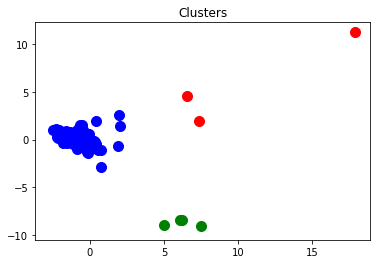

In [26]:
plt.scatter(principalComponents[y_hc3==0, 0], principalComponents[y_hc3==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(principalComponents[y_hc3==1, 0], principalComponents[y_hc3==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(principalComponents[y_hc3==2, 0], principalComponents[y_hc3==2, 1], s=100, c='green', label ='Cluster 3')
plt.title('Clusters')
plt.show()

In [27]:
final['Cluster3']=y_hc3

In [28]:
final[final.Cluster3==1]

,id,Cluster,Cluster3
0,-CC_CUB_OcD1-FC_OcD_0_CC_OcD_RTE_03_TA,1,1
1,-CC_P2_OcC_1-VF_OcCs_0_CC_OcC_11_TA,1,1
2,-CC_PB_AfA-VF_MeA_2_CC_AfA_27_TA,1,1
3,-CC_EP-PR_P1_E_FC_HAB148_TA,1,1
4,-CC_P13_LV-VF_Lv_14_CC_Lv13_12_TA,1,1
...,...,...,...
92,-CC_PF-PF_PB_FC_ROP_TA,1,1
93,-CC_P2_OcF_2-VF_OcFn_2_CC_OcF_04_TA,1,1
94,-Zelandia-P1_VRV_8_TA,1,1
95,-CC_P15_LV-VF_Lv_16_CC_Lv15_09_TA,1,1


In [29]:
final[final.Cluster3==2]

,id,Cluster,Cluster3
14,-CC_S1_OcF_2-VESTUARIOS_TEMP_AMB_01,0,2
36,-Recoletos_1-EXOC1_Termostato$2041_Temp$2e$20A...,0,2
57,-Recoletos_3-EXOC1_FC$20Terc_10_Temp$2e$20Ambi...,0,2
89,-Recoletos_5-EXOC1_FC$2057_Temp$2e$20Ambiente,0,2


## 4 Clusters

In [30]:
hc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc4=hc4.fit_predict(principalComponents)

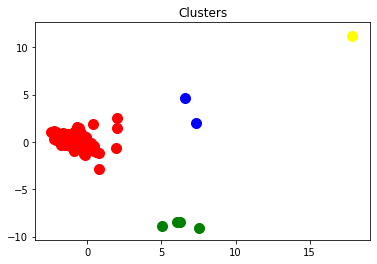

In [31]:
plt.scatter(principalComponents[y_hc4==0, 0], principalComponents[y_hc4==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(principalComponents[y_hc4==1, 0], principalComponents[y_hc4==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(principalComponents[y_hc4==2, 0], principalComponents[y_hc4==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(principalComponents[y_hc4==3, 0], principalComponents[y_hc4==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.title('Clusters')
plt.show()

In [32]:
final['Cluster4']=y_hc4

In [33]:
final.Cluster4.value_counts()

0    89
2     4
1     2
3     1
Name: Cluster4, dtype: int64

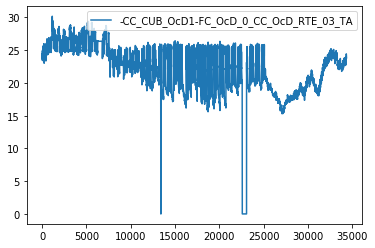

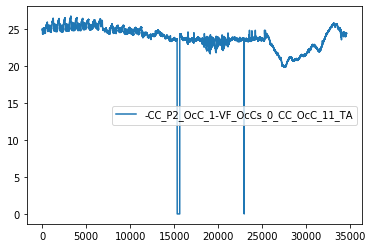

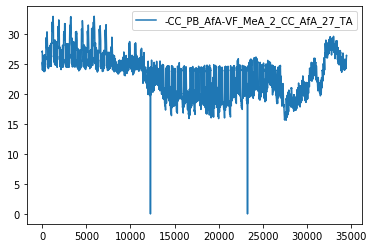

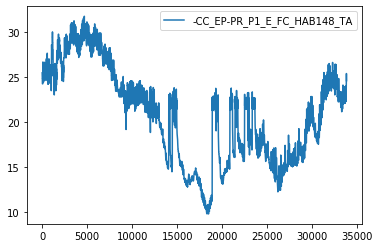

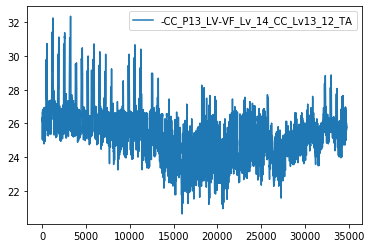

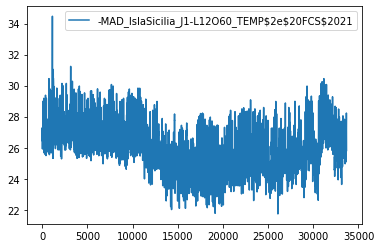

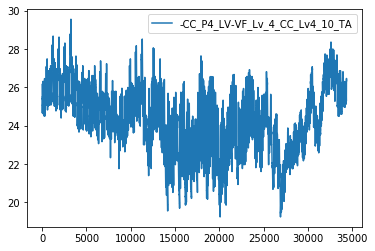

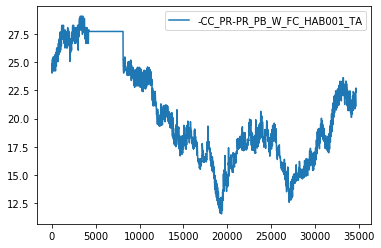

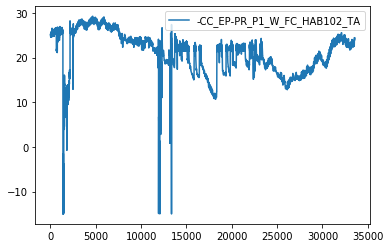

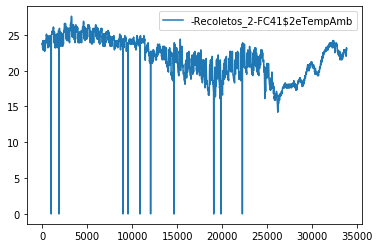

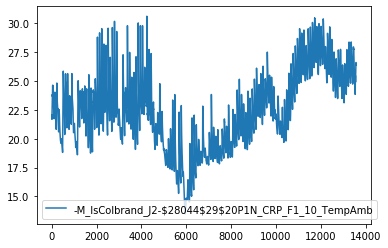

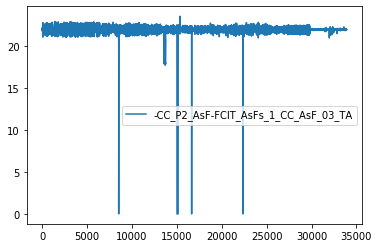

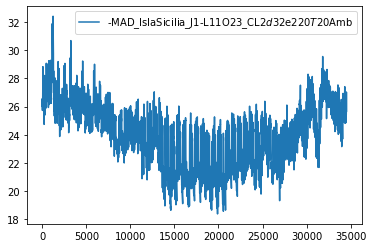

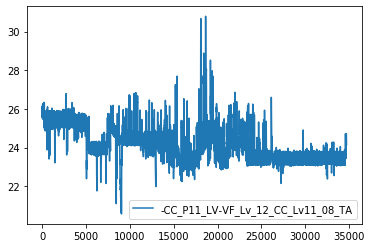

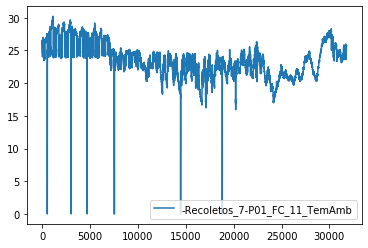

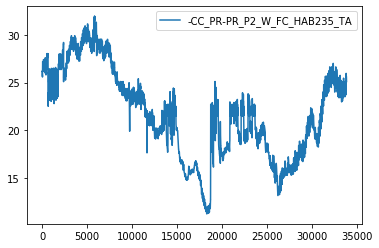

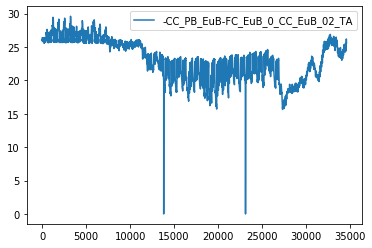

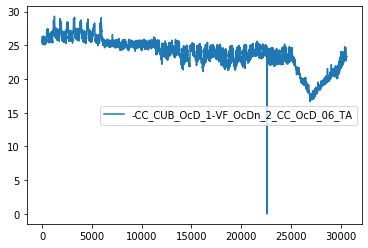

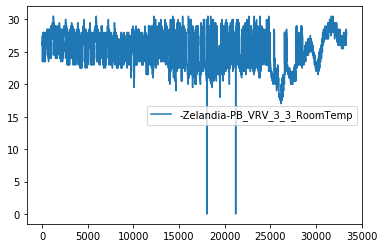

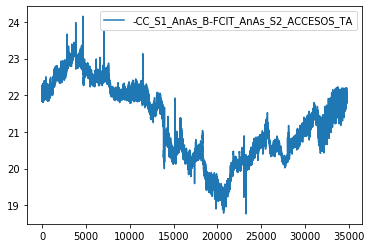

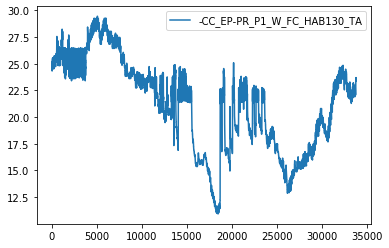

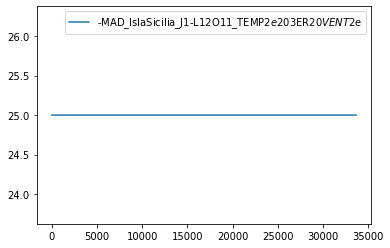

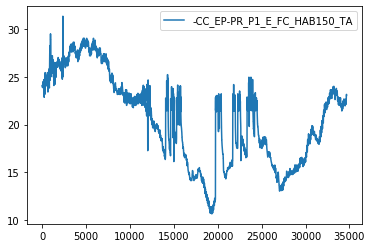

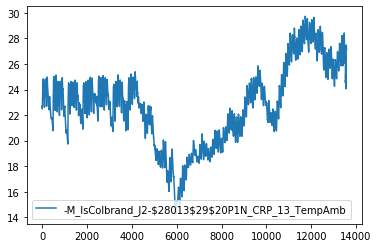

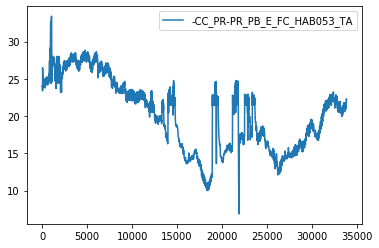

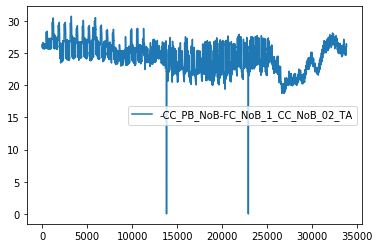

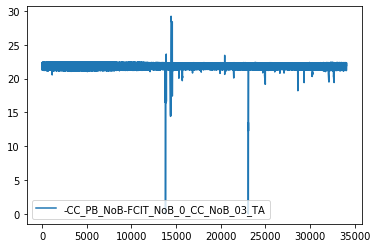

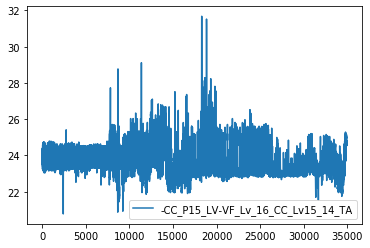

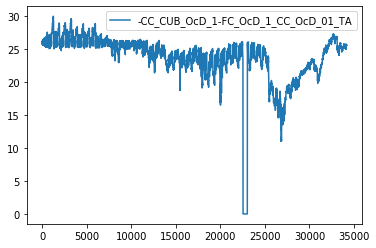

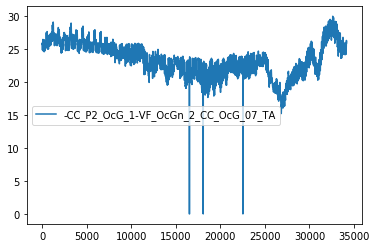

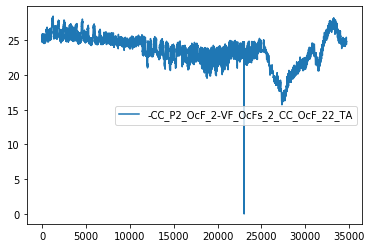

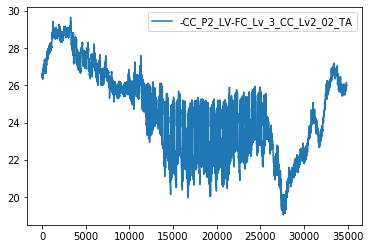

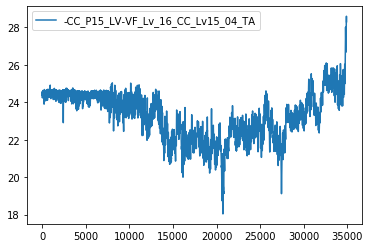

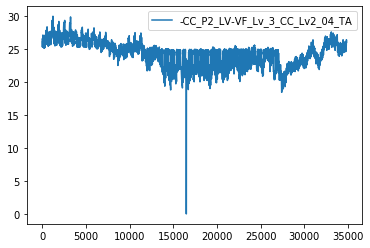

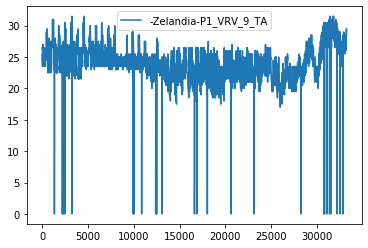

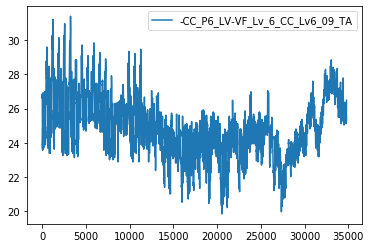

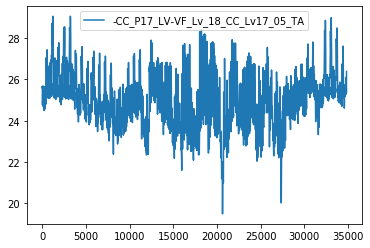

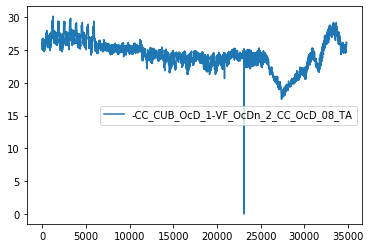

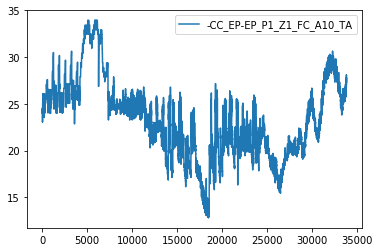

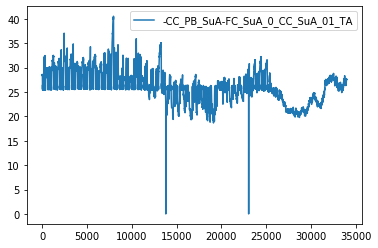

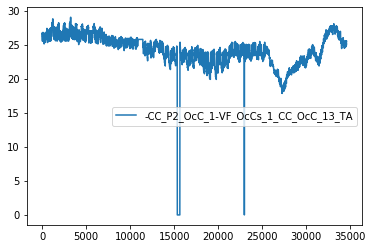

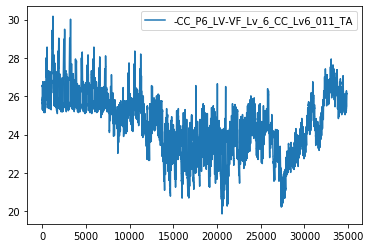

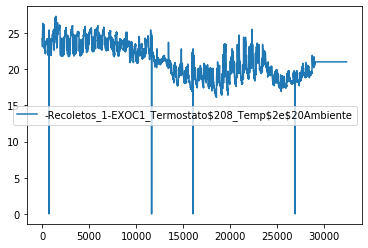

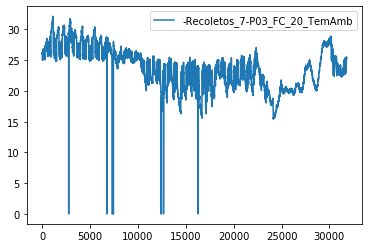

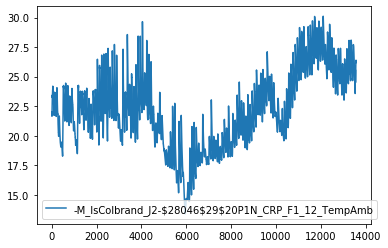

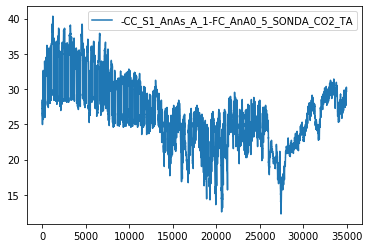

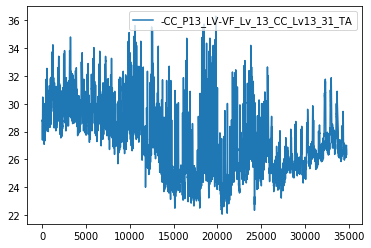

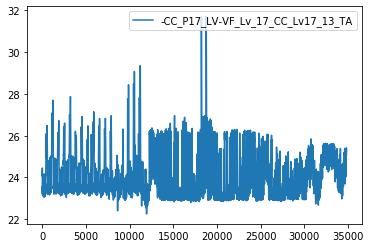

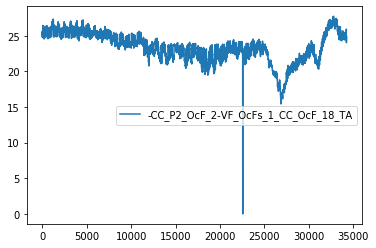

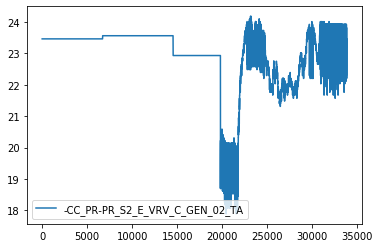

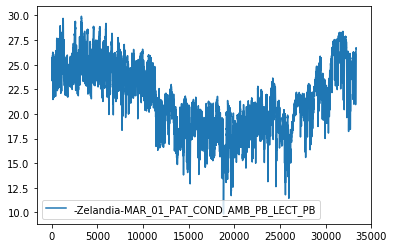

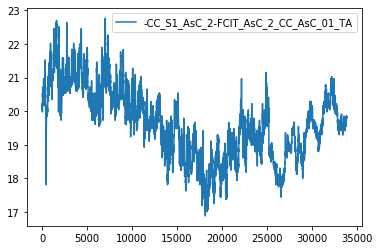

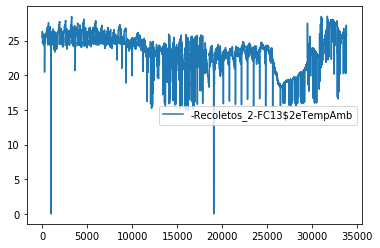

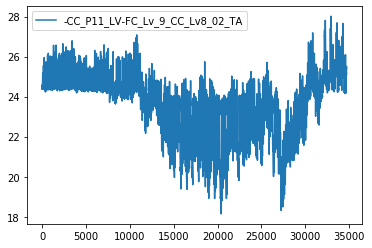

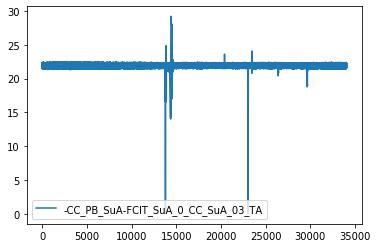

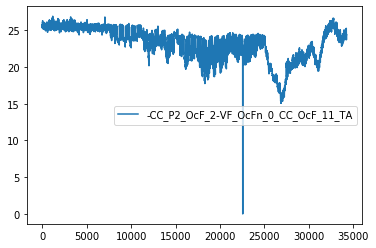

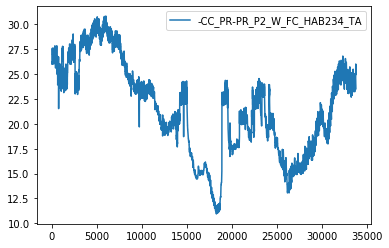

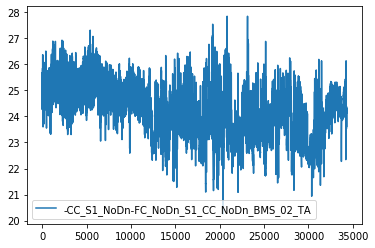

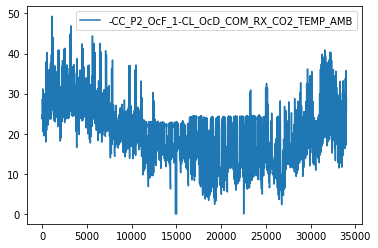

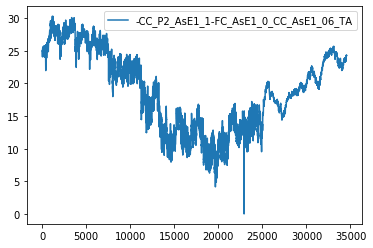

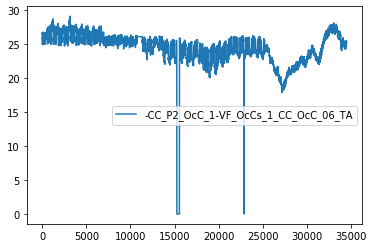

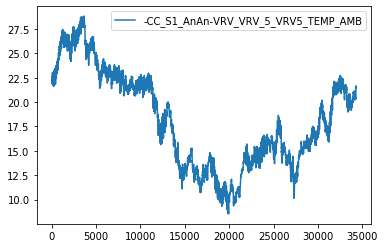

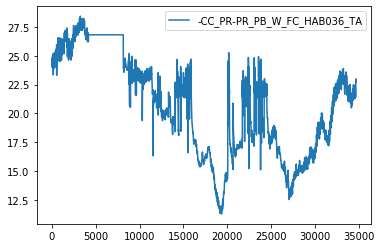

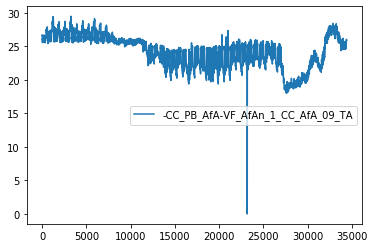

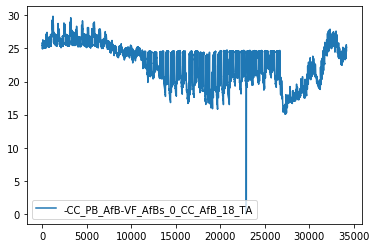

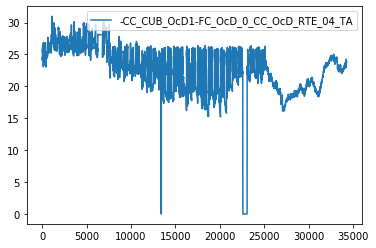

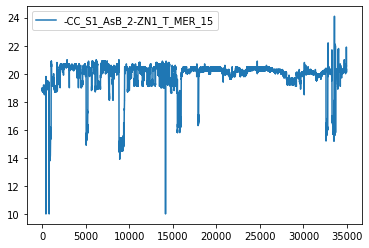

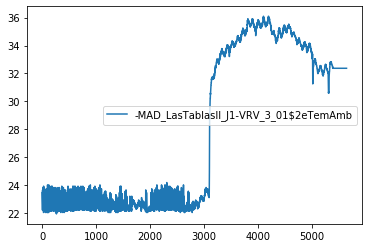

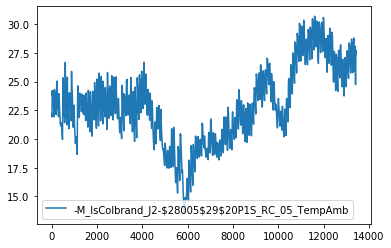

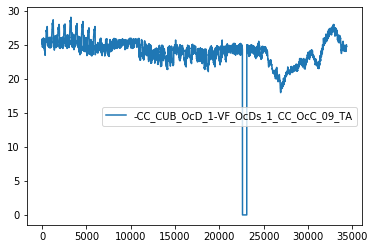

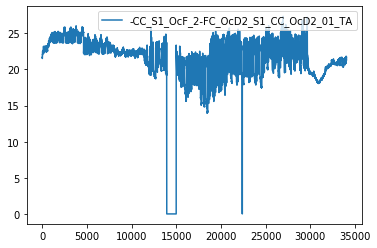

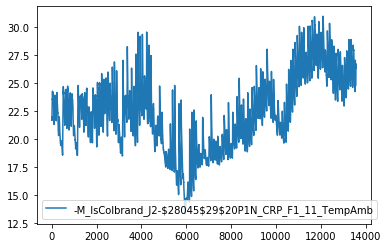

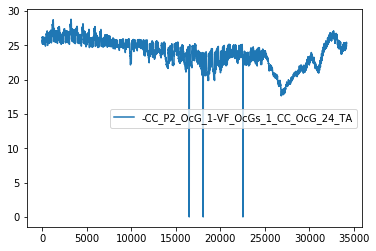

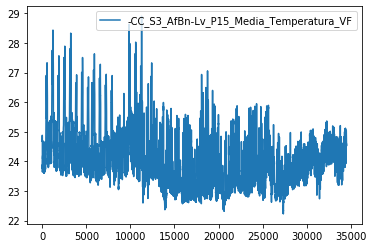

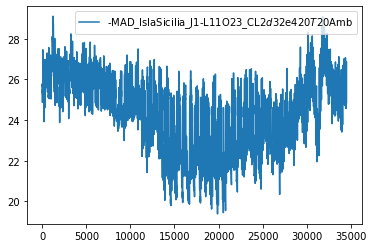

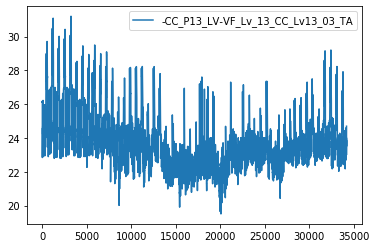

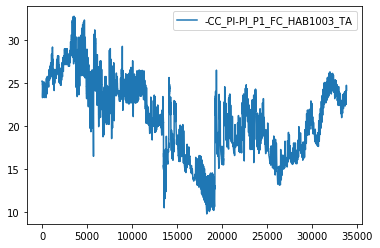

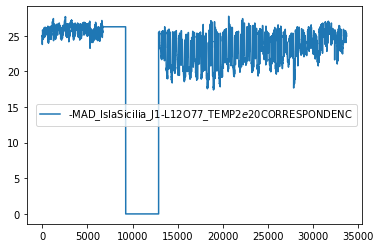

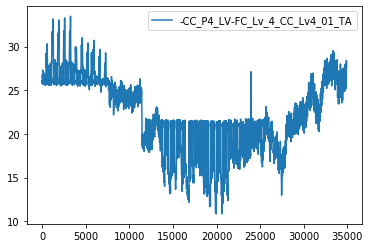

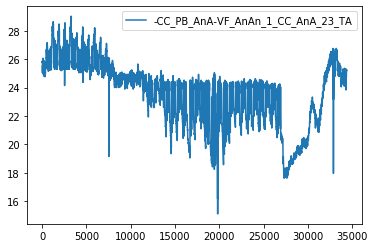

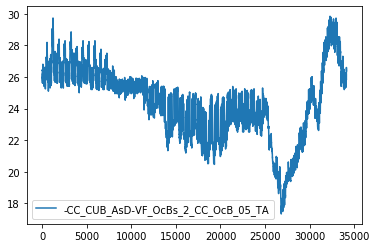

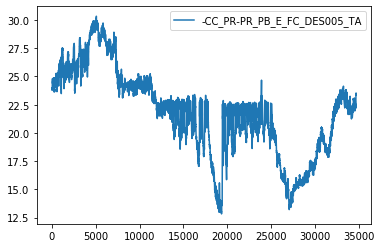

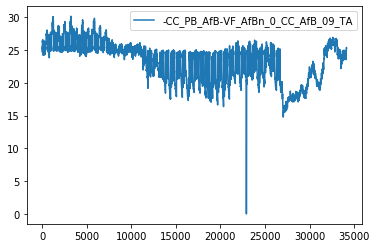

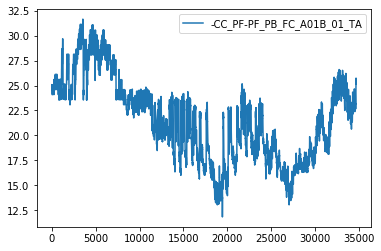

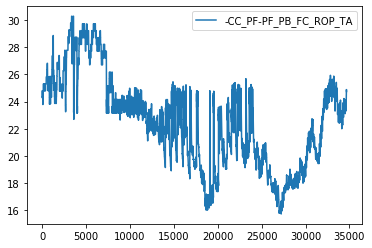

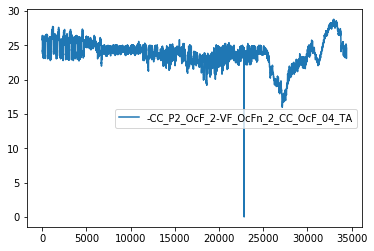

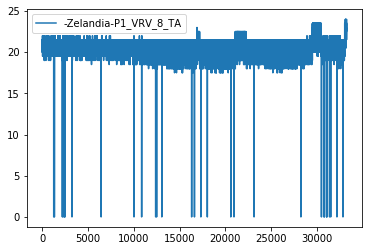

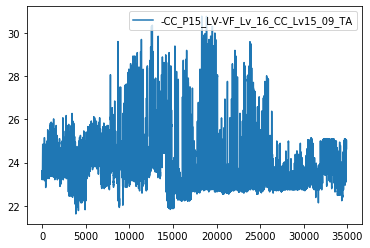

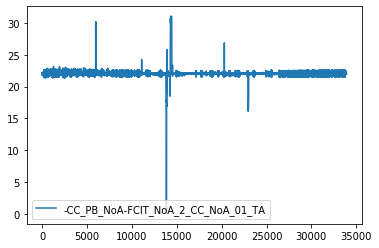

In [36]:
lista=final[final.Cluster4==0]
lista.reset_index(inplace=True)
for i in range(len(lista)):
    path= './DONE/'+ lista['id'][i]+'.csv'
    out7= pd.read_csv(path)
    out7.plot()

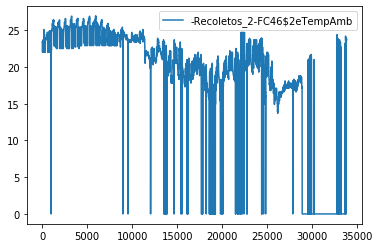

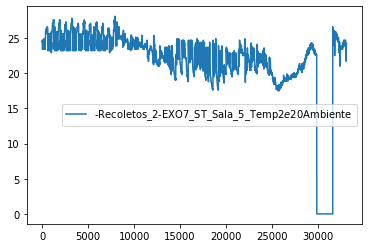

In [37]:
lista=final[final.Cluster4==1]
lista.reset_index(inplace=True)
for i in range(len(lista)):
    path= './DONE/'+ lista['id'][i]+'.csv'
    out7= pd.read_csv(path)
    out7.plot()

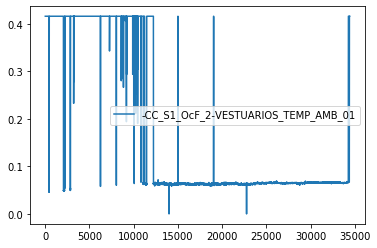

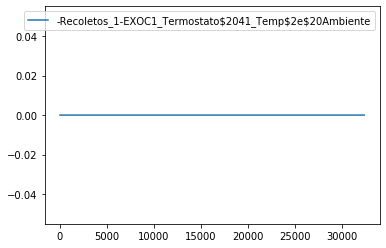

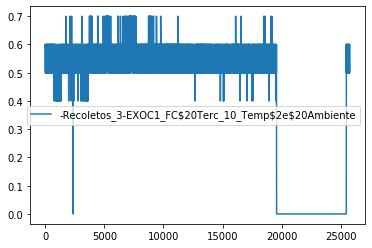

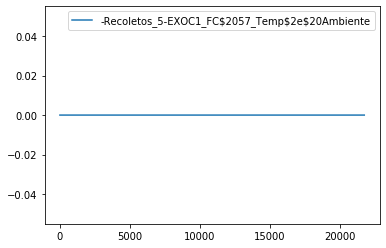

In [38]:
lista=final[final.Cluster4==2]
lista.reset_index(inplace=True)
for i in range(len(lista)):
    path= './DONE/'+ lista['id'][i]+'.csv'
    out7= pd.read_csv(path)
    out7.plot()

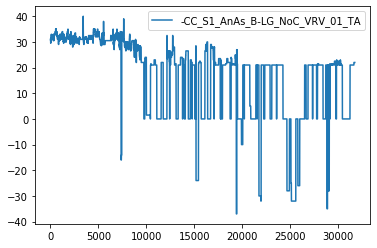

In [39]:
lista=final[final.Cluster4==3]
lista.reset_index(inplace=True)
for i in range(len(lista)):
    path= './DONE/'+ lista['id'][i]+'.csv'
    out7= pd.read_csv(path)
    out7.plot()

Rocio Gonzalez Lantero